## Covid-19 Dataset 

1. The data used here has been taken from kaggle and is a relatively smaller data set and is available as a csv file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('covid_19_data.csv')

In [3]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [5]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [6]:
#check null values 
data.isnull()

,Date,State,Region,Confirmed,Deaths,Recovered
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
316,False,False,False,False,False,False
317,False,False,False,False,False,False
318,False,False,False,False,False,False
319,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

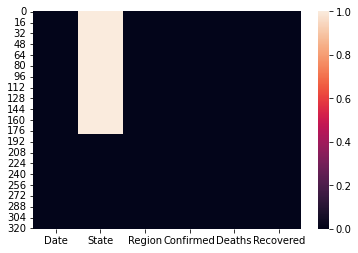

In [8]:
sns.heatmap(data.isnull())
plt.show

#### Q. Number of confirmed deaths and Recovered cases in each region and plotting them for the first 10 countries

In [9]:
data.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702


In [10]:
#for all three parameters 
data.groupby('Region').sum().head(3)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702


In [11]:
#for any one parameter - mention the column name in sq brackets
# data.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(5)
data.groupby('Region')['Confirmed', 'Recovered'].sum().head(10)

C:\Users\Samiksha\AppData\Local\Temp/ipykernel_5080/1412080755.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Confirmed', 'Recovered'].sum().head(10)


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
Antigua and Barbuda,24,11
Argentina,4285,1192
Armenia,1932,900
Australia,6752,5715


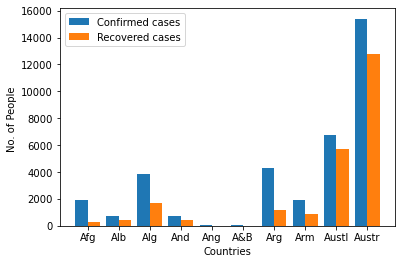

In [12]:
x = np.arange(10)
y1 = [1939, 766, 3848, 743, 27, 24, 4285,1932, 6752, 15402]
y2 = [252, 455, 1702, 423, 7, 11, 1192, 900, 5715, 12779]
width = 0.40

  
# plot data in grouped manner of bar type
# plt.title("")

plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xlabel("Countries")
plt.ylabel("No. of People ")
plt.xticks(x, ['Afg', 'Alb', 'Alg', 'And', 'Ang', 'A&B','Arg', 'Arm', 'Austl','Austr'])
plt.legend(["Confirmed cases", "Recovered cases"])
plt.show()


In [13]:
#sns.heatmap(data['Confirmed', 'Recovered'])
#plt.show(10)

#### Q. Remove all the records where confirmed cases are less than 10

In [14]:
data[data.Confirmed<10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [15]:
data[~(data.Confirmed < 10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [16]:
data= data[~(data.Confirmed < 10)]     # to remove the records satisfying a particular condition
data.head(15)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


#### Q. In which region maximum number of confirmed cases were recorded ?

In [17]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(5)

Region
US        1039909
Spain      236899
Italy      203591
France     166536
UK         166432
Name: Confirmed, dtype: int64

#### So, the maximum number of confirmed cases were seen in the US

#### Q. In which region minimum number of Deaths cases were recorded ?

In [18]:
data.groupby('Region')['Deaths'].sum().sort_values(ascending= True ).head(3)

Region
Cambodia       0
Seychelles     0
Saint Lucia    0
Name: Deaths, dtype: int64

#### So the minimum number of deaths were seen in Cambodia

#### Q. How many Confirmed, Deaths and Recovered cases were reported from India till 29th April 2020?

In [19]:
data[data.Region== 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [20]:
data[data.Region== 'US'].head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


#### Q. Sort the entire data w.r.t No. Of Confirmed cases in ascending order

In [21]:
data.sort_values(by = ['Confirmed'], ascending= True).head(5)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11


#### Q. Sort the entire data w.r.t No. Of Recovered cases in descending order

In [22]:
data.sort_values(by = ['Recovered'], ascending = False).head(5)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
